## Importing Libraries
This section loads necessary Python libraries for data processing and analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from math import sqrt

## Loading the Dataset
Here, we load the dataset into a pandas DataFrame for further analysis.

In [2]:
# This is what I did before
# # Load the dataset
# file_path = './data/data.csv'
# data = pd.read_csv(file_path)

# year_columns = [str(year) for year in range(2000, 2024)]
# data['Average Value'] = data[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# # Pivot the data to have one row per country with indicators as columns
# pivot_all = data.pivot(index='Country Name', columns='Indicator Name', values='Average Value').reset_index()

# # Fill missing values with column means (numeric only)
# pivot_all.fillna(pivot_all.mean(numeric_only=True), inplace=True)

# # Count missing values in each column
# missing_counts = pivot_all.isna().sum()
# print("Missing values per column after mean substitution:")
# print(missing_counts.to_string())

# target_indicators = ["Multidimensional poverty headcount ratio (UNDP) (% of population)",
#                     "Multidimensional poverty headcount ratio (World Bank) (% of population)"]

# target_cols = target_indicators
# feature_cols = [col for col in pivot_all.columns if col not in ['Country Name'] + target_cols]

In [3]:
# Load dataset
file_path = './data/data.csv'
data = pd.read_csv(file_path)

# Define year columns
year_columns = [str(year) for year in range(2000, 2024)]
data['Average Value'] = data[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# Pivot data so each country has indicators as columns
pivot_all = data.pivot(index='Country Name', columns='Indicator Name', values='Average Value').reset_index()

# Define target poverty index indicators
target_indicators = [
    "Multidimensional poverty headcount ratio (UNDP) (% of population)",
    "Multidimensional poverty headcount ratio (World Bank) (% of population)"
]

# Handle missing values in the poverty indices
# If one of the values is missing, copy the available value to the missing one
pivot_all[target_indicators] = pivot_all[target_indicators].apply(
    lambda row: row.fillna(row.max()), axis=1
)

# If both values are missing, set them to 0
pivot_all[target_indicators] = pivot_all[target_indicators].fillna(0)

# Fill remaining missing values with column means (numeric only)
pivot_all.fillna(pivot_all.mean(numeric_only=True), inplace=True)

# Count missing values in each column
missing_counts = pivot_all.isna().sum()
print("Missing values per column after mean substitution:")
print(missing_counts.to_string())

# Define features and target columns
target_cols = target_indicators
feature_cols = [col for col in pivot_all.columns if col not in ['Country Name'] + target_cols]


Missing values per column after mean substitution:
Indicator Name
Country Name                                                                                             0
Access to clean fuels and technologies for cooking (% of population)                                     0
Access to clean fuels and technologies for cooking, rural (% of rural population)                        0
Access to clean fuels and technologies for cooking, urban (% of urban population)                        0
Access to electricity (% of population)                                                                  0
Access to electricity, rural (% of rural population)                                                     0
Access to electricity, urban (% of urban population)                                                     0
Adequacy of social insurance programs (% of total welfare of beneficiary households)                     0
Adequacy of social protection and labor programs (% of total welfare of benefi

/var/folders/5h/fny2m5zj2cbd1c_t4ddpy4bc0000gp/T/ipykernel_25942/2261423847.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [4]:
# Filter countries where the poverty index is >= 15 for either UNDP or World Bank measures
countries_above_15 = pivot_all[pivot_all[target_indicators].ge(15).any(axis=1)][['Country Name'] + target_indicators]

# Print the result
print(countries_above_15)

#67 countries have a poverty index >= 15 for either UNDP or World Bank measures

Indicator Name Country Name  \
0               Afghanistan   
7                    Angola   
18               Bangladesh   
23                    Benin   
28                 Botswana   
..                      ...   
249                  Uganda   
257                 Vanuatu   
263             Yemen, Rep.   
264                  Zambia   
265                Zimbabwe   

Indicator Name  Multidimensional poverty headcount ratio (UNDP) (% of population)  \
0                                                            55.9                   
7                                                            51.1                   
18                                                           24.6                   
23                                                           66.8                   
28                                                           17.2                   
..                                                            ...                   
249                             

In [5]:
pivot_all.head(20)

Indicator Name,Country Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),...,Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population),"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
0,Afghanistan,21.082609,8.043478,65.206522,57.091304,56.250000,88.478261,15.695031,22.986309,27.620965,...,9.380000,12.056000,6.779167,24.164500,3.694194,12.883136,11.302712,4.400000,9.200000,31.750000
1,Africa Eastern and Southern,16.216174,6.084468,36.892245,31.756021,19.035696,64.252047,32.727504,25.344468,11.144340,...,9.726116,9.707106,8.045727,33.101367,17.783788,29.923557,24.223999,3.352427,5.412662,22.044024
2,Africa Western and Central,9.784074,2.324753,20.334051,44.396391,21.283856,77.845398,32.727504,25.344468,11.144340,...,4.739257,8.999405,5.375013,42.548869,11.736183,22.020465,17.359298,4.727742,5.412662,22.044024
3,Albania,65.206522,45.376087,84.060870,99.726087,99.956522,98.756522,210.773777,185.160654,53.513213,...,11.481125,15.362188,13.559364,53.509792,40.546992,41.690611,41.219413,1.500000,0.800000,10.700000
4,Algeria,98.904348,97.154348,99.886957,99.095652,97.969565,99.656522,32.727504,25.344468,11.144340,...,17.275000,16.845000,15.082500,68.202917,71.129804,66.420018,67.200178,3.352427,0.000000,3.800000
5,American Samoa,62.470171,53.335766,72.543542,80.366839,73.804808,90.480497,32.727504,25.344468,11.144340,...,9.726116,9.707106,8.076667,87.636417,54.794675,57.114110,56.178834,3.352427,5.412662,22.044024
6,Andorra,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,32.727504,25.344468,11.144340,...,9.726116,9.707106,8.045727,89.194500,54.794675,57.114110,56.178834,3.352427,5.412662,22.044024
7,Angola,45.321739,7.591304,77.941304,36.286957,3.920000,61.817391,51.766544,51.766544,11.144340,...,15.798333,19.404500,13.642857,60.474542,19.712749,40.485536,30.239423,5.200000,7.900000,30.300000
8,Antigua and Barbuda,100.000000,100.000000,100.000000,98.921739,98.969565,99.986957,32.727504,25.344468,11.144340,...,9.726116,9.707106,8.420000,26.852583,54.794675,57.114110,56.178834,3.352427,5.412662,22.044024
9,Arab World,83.809187,73.364777,92.708843,86.731821,76.226976,96.244039,32.727504,25.344468,11.144340,...,9.726116,9.707106,10.065696,56.583119,60.694940,67.752322,66.402942,3.352427,5.412662,22.044024


## Summary Statistics
This section displays descriptive statistics of the dataset.

In [6]:
pivot_all.describe()

Indicator Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),...,Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population),"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,62.470171,53.335766,72.543542,80.366839,73.804808,90.480497,32.727504,25.344468,11.144340,12.527918,...,9.726116,9.707106,8.045727,57.682152,54.794675,57.114110,56.178834,3.352427,5.412662,22.044024
std,35.511853,38.561362,32.020883,27.487531,33.397869,16.672236,15.401420,14.074653,6.355860,3.155581,...,6.509536,5.236979,5.264758,22.850017,29.102340,22.134687,24.949743,0.717074,4.465624,11.452792
min,0.073913,0.021739,0.073913,4.475000,1.088889,10.878261,0.242614,0.455201,0.044717,0.930070,...,0.065000,0.225000,0.363333,11.222167,2.002725,9.689401,6.687633,1.100000,0.000000,0.000000
25%,31.572283,11.450475,57.746196,65.793478,53.378261,89.102904,32.308097,23.485743,10.775810,12.527918,...,5.129725,6.683147,4.637775,39.248432,28.450605,40.540467,36.152204,3.352427,3.427083,20.051250
50%,63.772771,53.335766,83.039180,95.793478,92.686218,99.144765,32.727504,25.344468,11.144340,12.527918,...,9.726116,9.707106,6.987875,56.898606,54.794675,57.114110,56.178834,3.352427,5.412662,22.044024
75%,99.572207,98.967203,99.799871,99.908696,99.999770,99.942968,32.727504,25.344468,11.144340,12.527918,...,11.288136,10.611156,9.673425,76.561854,83.664202,76.236237,78.633134,3.352427,5.412662,22.044024
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,210.773777,185.160654,55.153564,30.050132,...,40.925708,43.115000,35.042238,100.000000,99.655731,99.243846,99.302651,7.100000,32.050000,75.400000


## Checking for Missing Values
This block checks for missing values in key indicators.

In [7]:
missing_mphr = pivot_all[target_indicators].isna().sum()
print("Missing values in the target indicators (MPHR):")
print(missing_mphr)

Missing values in the target indicators (MPHR):
Indicator Name
Multidimensional poverty headcount ratio (UNDP) (% of population)          0
Multidimensional poverty headcount ratio (World Bank) (% of population)    0
dtype: int64


## Identifying Highly Correlated Features
This section identifies pairs of features that have a high correlation (absolute correlation > 0.8) to avoid multicollinearity issues in the dataset. It also visualizes the correlation matrix using a heatmap.


Highly Correlated Feature Pairs (|correlation| > 0.8):

- Children in employment, study and work, male (% of male children in employment, ages 7-14) */ Children in employment, work only, male (% of male children in employment, ages 7-14) (Correlation: -1.000)
- Children in employment, study and work, female (% of female children in employment, ages 7-14) */ Children in employment, work only, female (% of female children in employment, ages 7-14) (Correlation: -1.000)
- Children in employment, study and work (% of children in employment, ages 7-14) */ Children in employment, work only (% of children in employment, ages 7-14) (Correlation: -1.000)
- Children out of school, primary */ Children out of school, primary, male (Correlation: 0.998)
- Children out of school, primary */ Children out of school, primary, female (Correlation: 0.997)
- Children out of school, primary, female */ Children out of school, primary, male (Correlation: 0.995)
- Literacy rate, adult female (% of females age

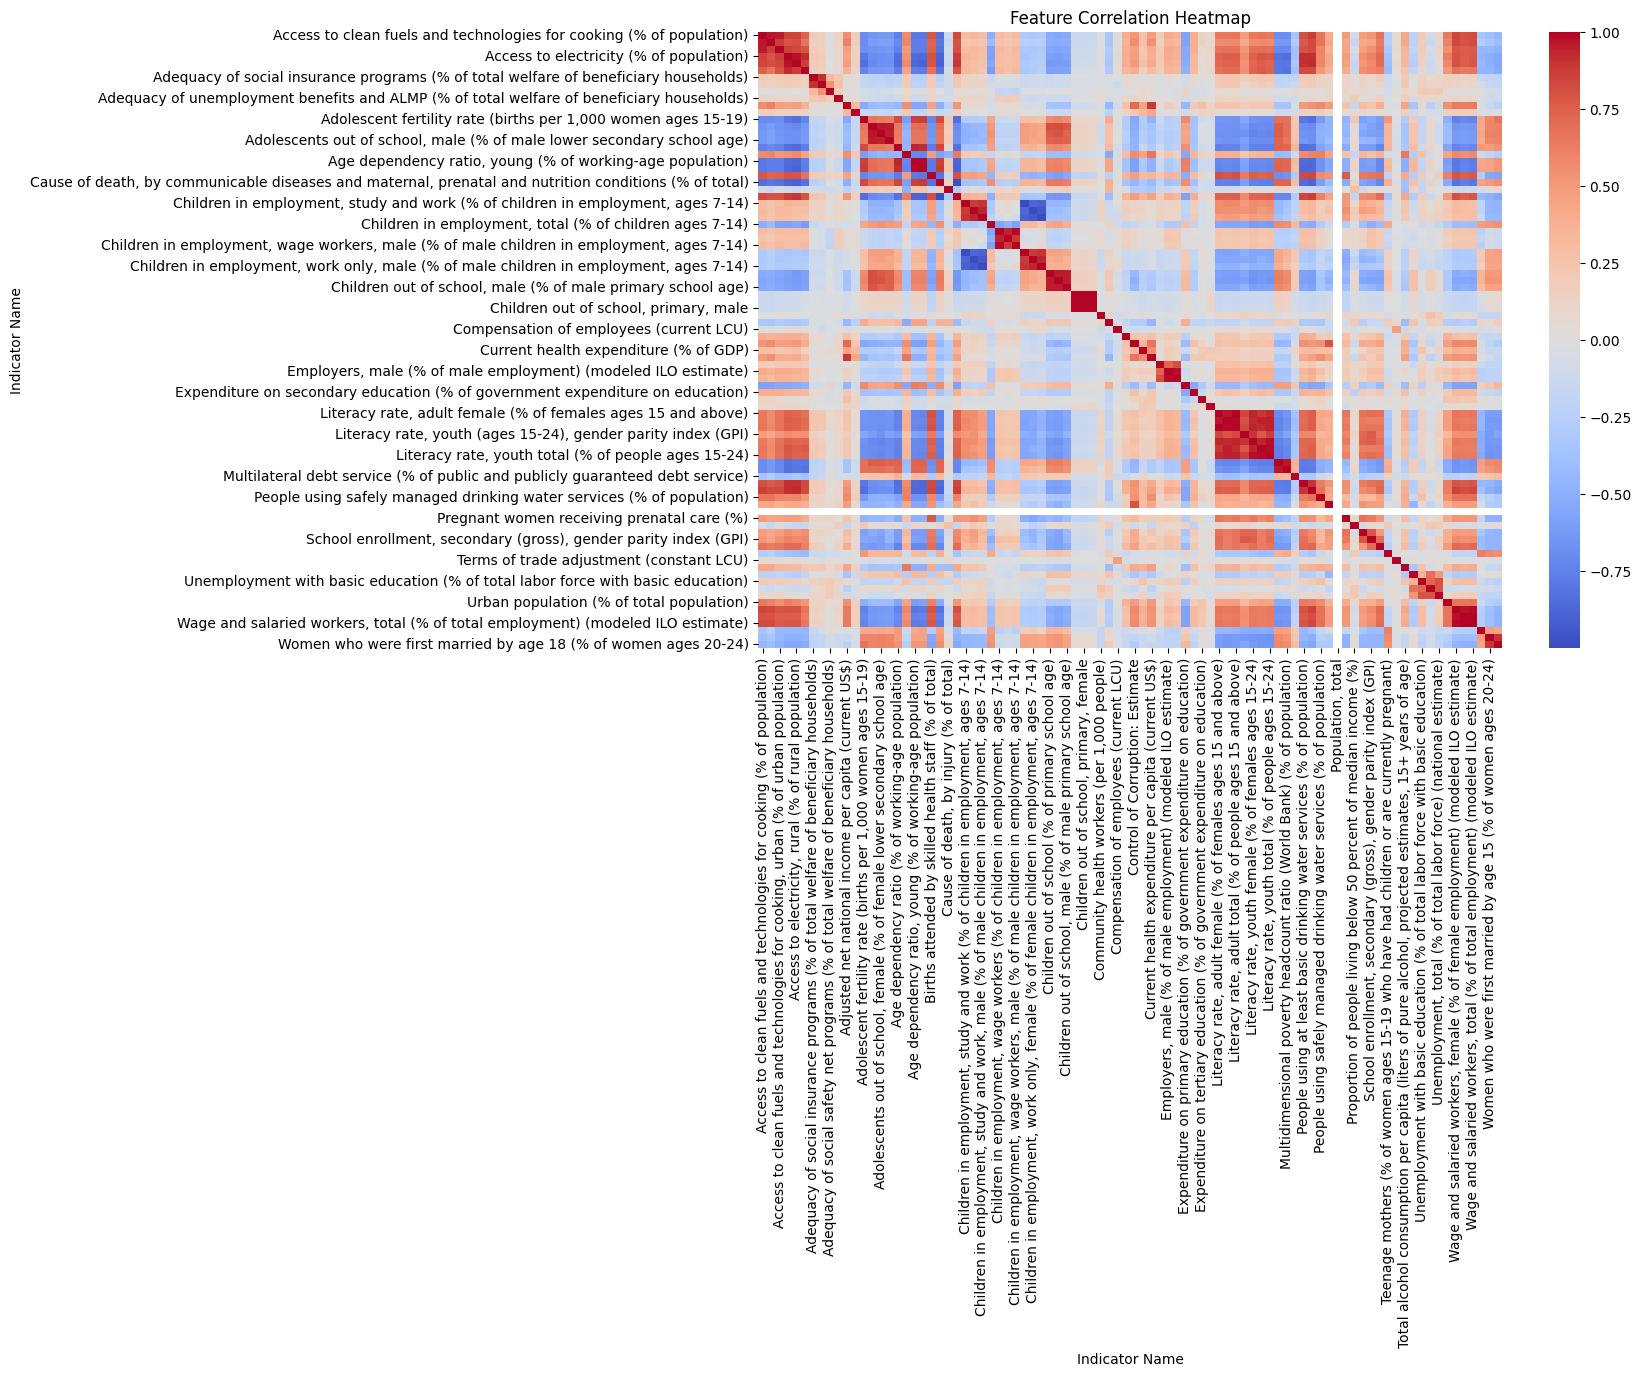

In [8]:
# Compute the correlation matrix for numeric columns
correlation_matrix = pivot_all.corr(numeric_only=True)

# Identify highly correlated features (absolute correlation > 0.8)
threshold = 0.8
high_corr_features = correlation_matrix.abs() > threshold

# Ensure we ignore self-correlations
np.fill_diagonal(high_corr_features.values, False)

# Extract unique pairs of highly correlated features
correlated_pairs = []
seen_pairs = set()  # Set to track seen feature pairs

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if high_corr_features.loc[col1, col2]:
            pair = tuple(sorted([col1, col2]))  # Sort to ensure uniqueness (A, B) == (B, A)
            if pair not in seen_pairs:
                correlated_pairs.append((pair[0], pair[1], correlation_matrix.loc[col1, col2]))
                seen_pairs.add(pair)  


high_corr_df = pd.DataFrame(correlated_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Sort by absolute correlation value for better readability
high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False, key=abs)


print("\nHighly Correlated Feature Pairs (|correlation| > 0.8):\n")
for index, row in high_corr_df.iterrows():
    print(f"- {row['Feature 1']} */ {row['Feature 2']} (Correlation: {row['Correlation']:.3f})")

# # Save the highly correlated features to a CSV file
# high_corr_df.to_csv("highly_correlated_features.csv", index=False)
# print("\nHighly correlated features saved as 'highly_correlated_features.csv'.")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Identifying Highly Correlated Features
This section identifies pairs of features that have a high correlation (absolute correlation > 0.8) to avoid multicollinearity issues in the dataset. It also visualizes the correlation matrix using a heatmap.

In [9]:
# Identify features to keep by removing redundant ones (except for target indicators)
correlated_features = [(pair[0], pair[1]) for pair in correlated_pairs]

# Convert correlated_features list into a set of features to remove, keeping one from each pair
features_to_remove = set(pair[1] for pair in correlated_features)

# Ensure we do not remove our target indicators
features_to_remove -= set(target_indicators)

# Keep only the uncorrelated features and the target indicators
filtered_features = [col for col in pivot_all.columns if col not in features_to_remove]

# Filter the dataset
filtered_pivot_all= pivot_all[filtered_features]


In [10]:
print(len(filtered_pivot_all.columns))
print(filtered_pivot_all.columns)

47
Index(['Country Name',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Adequacy of social insurance programs (% of total welfare of beneficiary households)',
       'Adequacy of social safety net programs (% of total welfare of beneficiary households)',
       'Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)',
       'Adjusted net national income per capita (current US$)',
       'Adjusted savings: education expenditure (current US$)',
       'Adolescents out of school (% of lower secondary school age)',
       'Age dependency ratio, old (% of working-age population)',
       'Births attended by skilled health staff (% of total)',
       'Cause of death, by injury (% of total)',
       'Children in employment, study and work (% of children in employment, ages 7-14)',
       'Children in employment, total (% of children ages 7-14)',
       'Children in employment, wage workers (% of children in employmen

## Train a few regression model to generalize the trends
Here, the dataset is divided into training and test sets.
Then it is trained with linear regression model, ridge regression model, and random forest regression.


Training Linear Regression for Multidimensional poverty headcount ratio (UNDP) (% of population)...
MSE:  147.51
RMSE: 12.15
MAE:  8.49
R²:   0.771


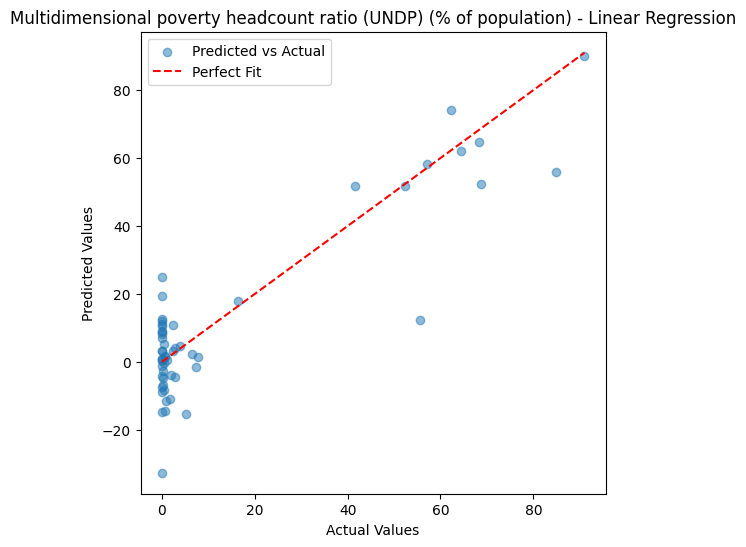


Training Linear Regression for Multidimensional poverty headcount ratio (World Bank) (% of population)...
MSE:  230.15
RMSE: 15.17
MAE:  10.48
R²:   0.601


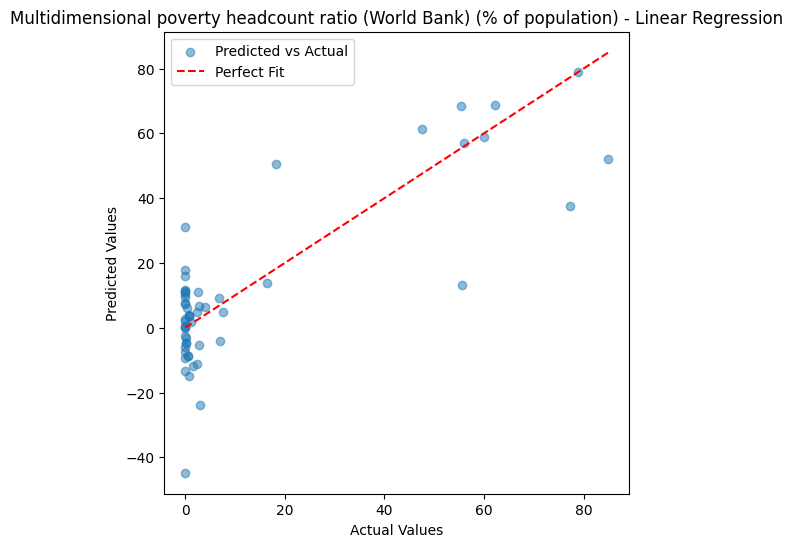


Training Ridge Regression for Multidimensional poverty headcount ratio (UNDP) (% of population)...
MSE:  144.71
RMSE: 12.03
MAE:  8.40
R²:   0.775


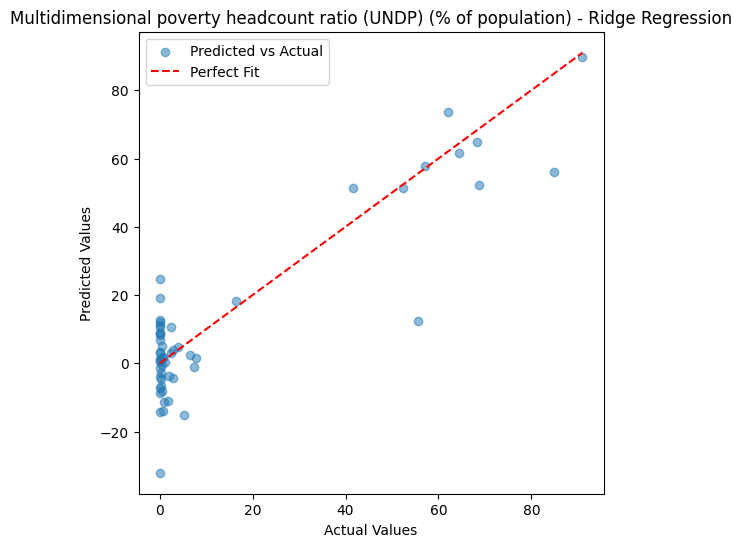


Training Ridge Regression for Multidimensional poverty headcount ratio (World Bank) (% of population)...
MSE:  225.75
RMSE: 15.02
MAE:  10.34
R²:   0.609


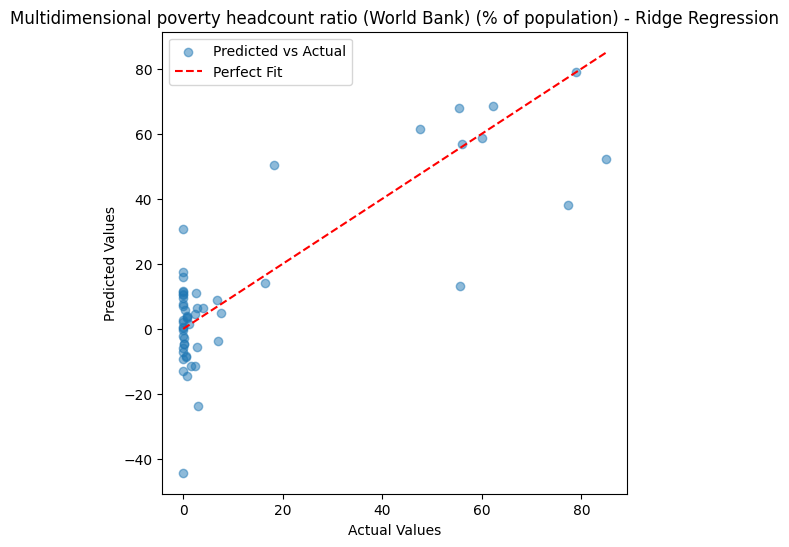


Training Random Forest Regressor for Multidimensional poverty headcount ratio (UNDP) (% of population)...
MSE:  104.85
RMSE: 10.24
MAE:  5.82
R²:   0.837


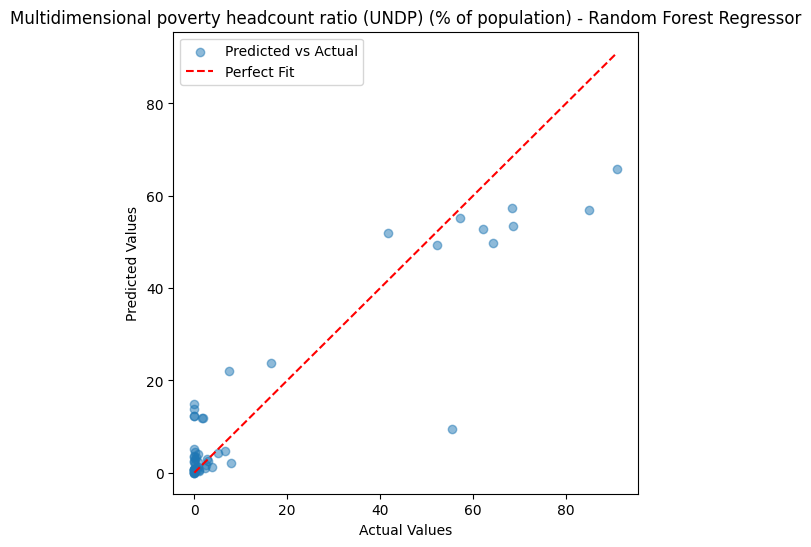


Training Random Forest Regressor for Multidimensional poverty headcount ratio (World Bank) (% of population)...
MSE:  116.24
RMSE: 10.78
MAE:  5.98
R²:   0.798


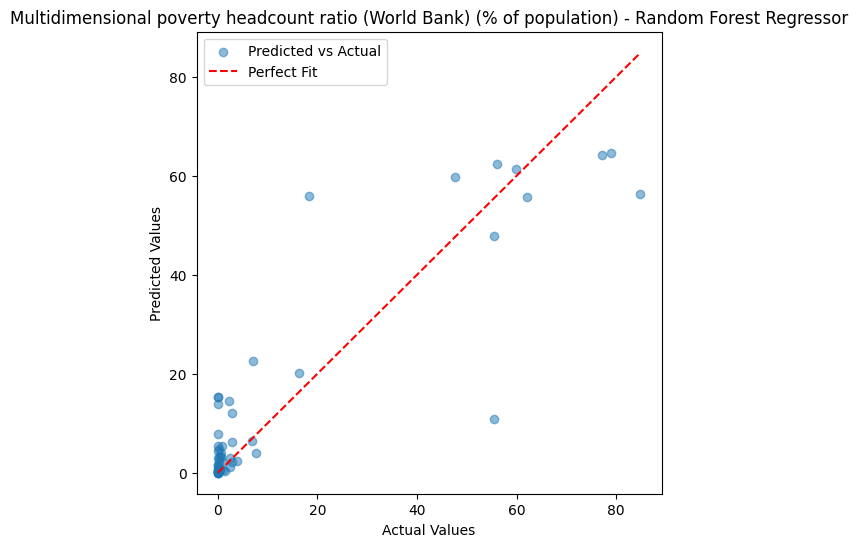

In [11]:
target_indicators = [
    "Multidimensional poverty headcount ratio (UNDP) (% of population)",
    "Multidimensional poverty headcount ratio (World Bank) (% of population)"
]

# Select feature columns
feature_cols = [col for col in filtered_pivot_all.columns if col not in ["Country Name"] + target_indicators]

# Extract feature matrix and target variables
X = filtered_pivot_all[feature_cols].values
y = np.column_stack((filtered_pivot_all[target_indicators[0]].values, 
                    filtered_pivot_all[target_indicators[1]].values))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix (Prevent Data Leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Apply the same transformation

# Extract separate target variables
y1_train, y1_test = y_train[:, 0], y_test[:, 0]
y2_train, y2_test = y_train[:, 1], y_test[:, 1]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Function to train and evaluate models
def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test, target_name):
    print(f"\nTraining {model_name} for {target_name}...")
    
    # Train Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print Metrics
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R²:   {r2:.3f}")

    # Plot Predictions vs Actual
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{target_name} - {model_name}")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
    plt.legend()
    plt.show()

# Train and evaluate models for each poverty index
for model_name, model in models.items():
    train_and_evaluate(model, model_name, X_train, X_test, y1_train, y1_test, target_indicators[0])
    train_and_evaluate(model, model_name, X_train, X_test, y2_train, y2_test, target_indicators[1])

## XGBoost
The data is now trained with XGBoost model.

XGBoost Model - Multidimensional poverty headcount ratio (UNDP) (% of population): MSE = 147.00, RMSE = 12.12, MAE = 6.42, R² = 0.772
XGBoost Model - Multidimensional poverty headcount ratio (World Bank) (% of population): MSE = 146.19, RMSE = 12.09, MAE = 6.16, R² = 0.747


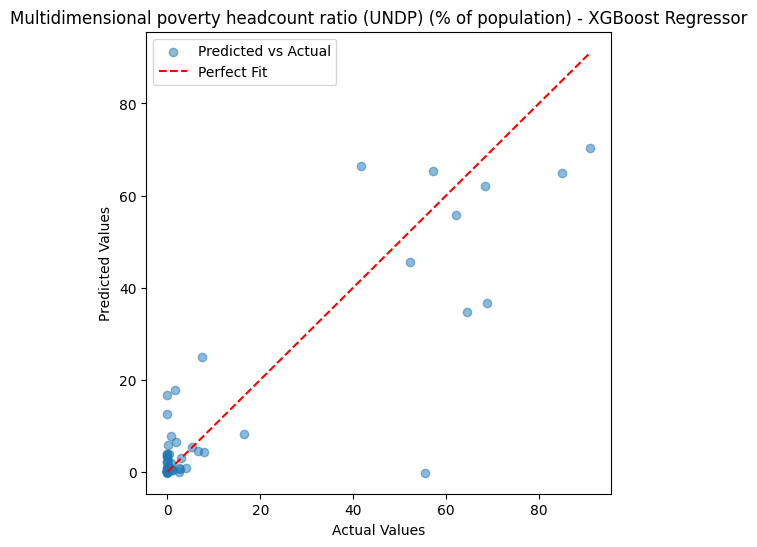

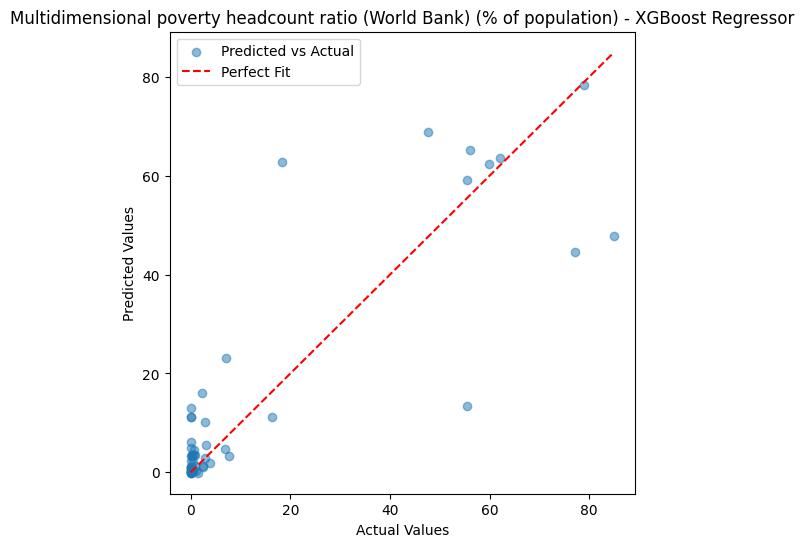

In [12]:
# Define target indicators (both UNDP and World Bank poverty indices)
from matplotlib.pylab import rand


target_indicators = [
    "Multidimensional poverty headcount ratio (UNDP) (% of population)",
    "Multidimensional poverty headcount ratio (World Bank) (% of population)"
]

# Ensure cleaned dataset is used
feature_cols = [col for col in filtered_pivot_all.columns if col not in ["Country Name"] + target_indicators]

# Extract feature matrix and target variables
X = filtered_pivot_all[feature_cols].values
y1 = filtered_pivot_all[target_indicators[0]].values  # UNDP Poverty Index
y2 = filtered_pivot_all[target_indicators[1]].values  # World Bank Poverty Index

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets for both targets
X_train, X_test, y1_train, y1_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y2_train, y2_test = train_test_split(X_scaled, y2, test_size=0.2, random_state=42)

# Initialize and train XGBoost models for each target
model1 = XGBRegressor(random_state=42)
model1.fit(X_train, y1_train)
y1_pred = model1.predict(X_test)

model2 = XGBRegressor(random_state=42)
model2.fit(X_train2, y2_train)
y2_pred = model2.predict(X_test2)

# Evaluate the models
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)  # Root Mean Squared Error
mae1 = mean_absolute_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)  # Root Mean Squared Error
mae2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"XGBoost Model - {target_indicators[0]}: MSE = {mse1:.2f}, RMSE = {rmse1:.2f}, MAE = {mae1:.2f}, R² = {r2_1:.3f}")
print(f"XGBoost Model - {target_indicators[1]}: MSE = {mse2:.2f}, RMSE = {rmse2:.2f}, MAE = {mae2:.2f}, R² = {r2_2:.3f}")

# Function for plotting actual vs predicted values
def plot_results(y_test, y_pred, target_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{target_name} - XGBoost Regressor")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
    plt.legend()
    plt.show()

# Plot results for both models
plot_results(y1_test, y1_pred, target_indicators[0])
plot_results(y2_test, y2_pred, target_indicators[1])

## SHapley Additive exPlanations (SHAP)
It is a popular method for interpreting the predictions of machine learning models by assigning importance values to each feature based on Shapley values from cooperative game theory. SHAP helps explain how each feature contributes to the model’s output for a specific prediction

Model 1 SHAP


/Users/tom/Documents/My_code/CxC 2025/cxc/lib/python3.12/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


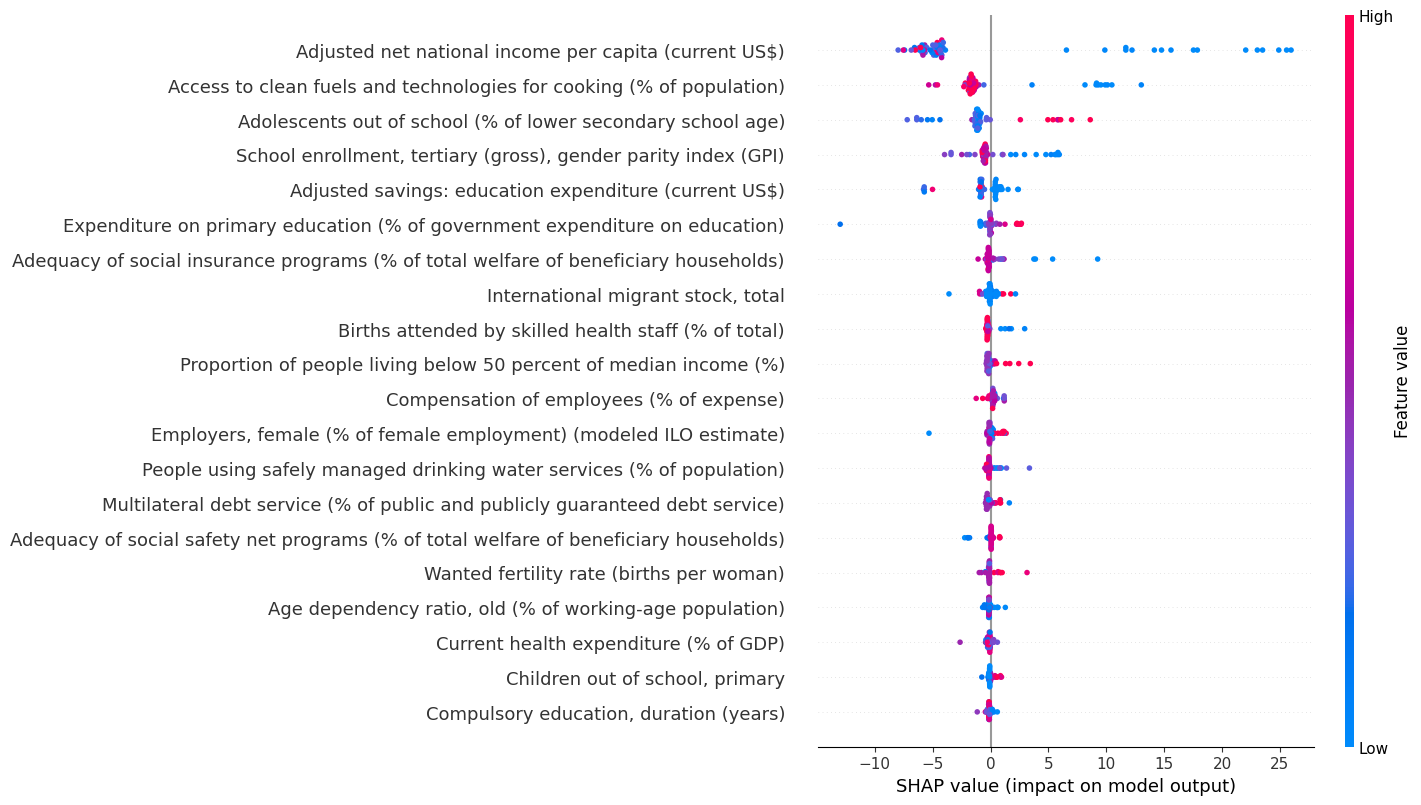

Model 2 SHAP


/Users/tom/Documents/My_code/CxC 2025/cxc/lib/python3.12/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


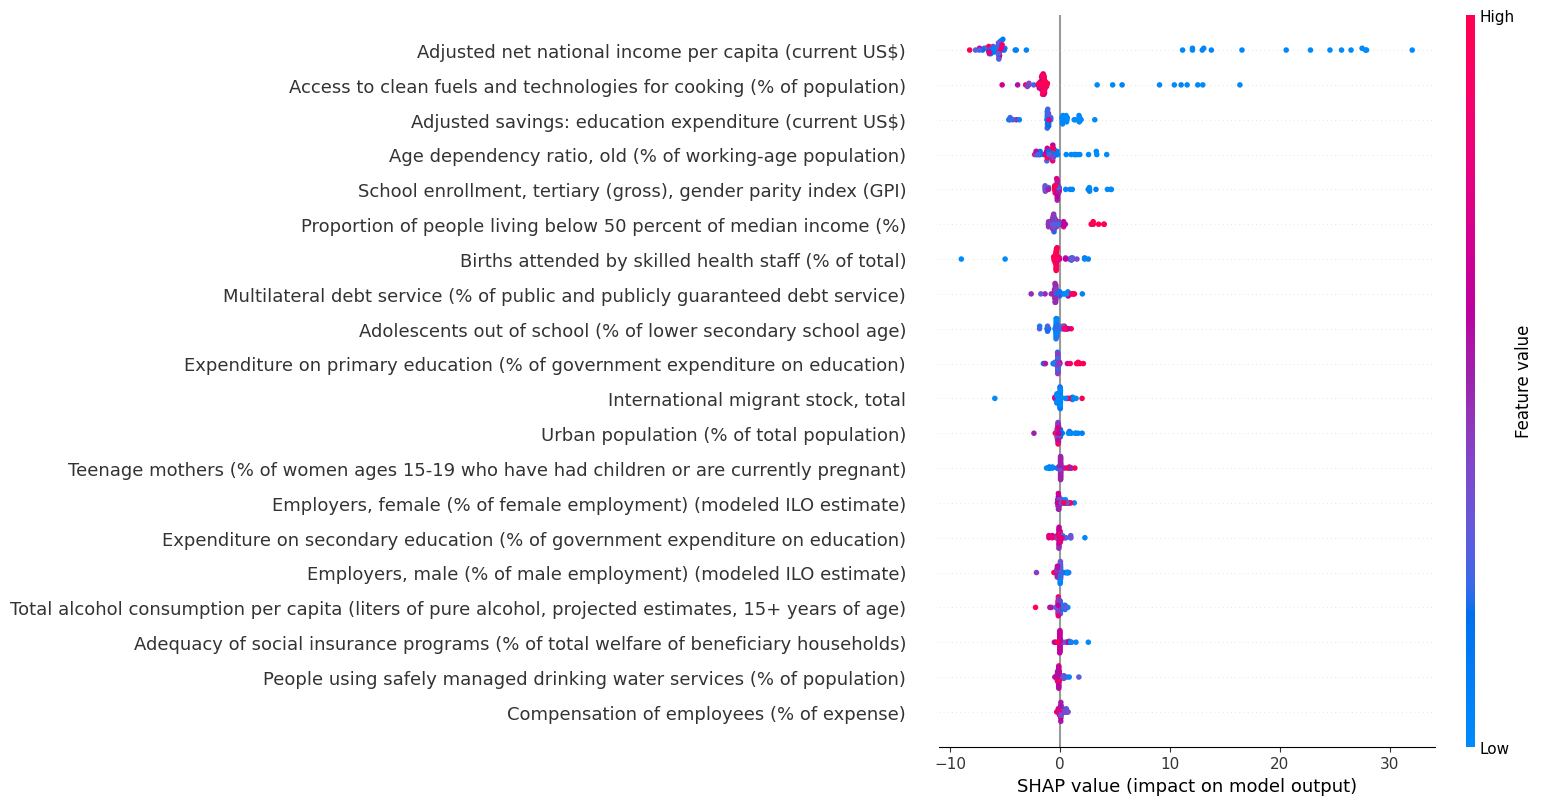

In [13]:
import shap

# Compute SHAP values for model1
explainer1 = shap.Explainer(model1)
shap_values1 = explainer1(X_test)

print("Model 1 SHAP")
shap.summary_plot(shap_values1, X_test, feature_names=feature_cols)

# Compute SHAP values for model2
explainer2 = shap.Explainer(model2)
shap_values2 = explainer2(X_test2)  # Use X_test2 for model2

print("Model 2 SHAP")
shap.summary_plot(shap_values2, X_test2, feature_names=feature_cols)

## Feature importance analysis
Here we see the most important features of each model.

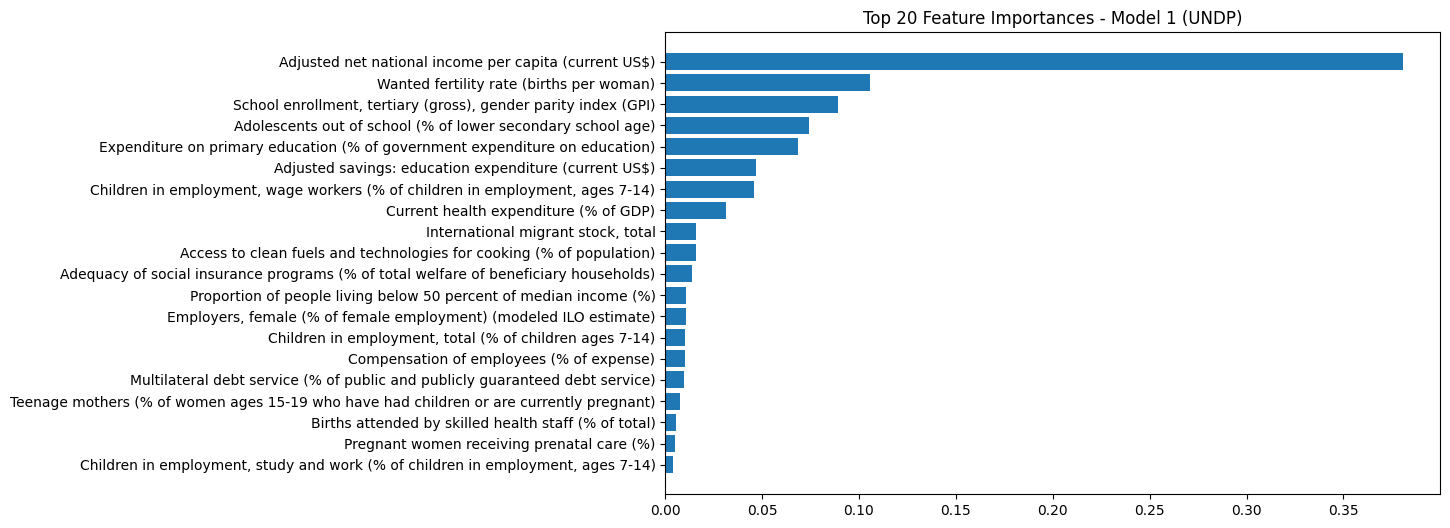

In [14]:
# Feature Importance for Model 1
importances = model1.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh([feature_cols[i] for i in sorted_idx[-20:]], importances[sorted_idx[-20:]])
plt.title("Top 20 Feature Importances - Model 1 (UNDP)")
plt.show()

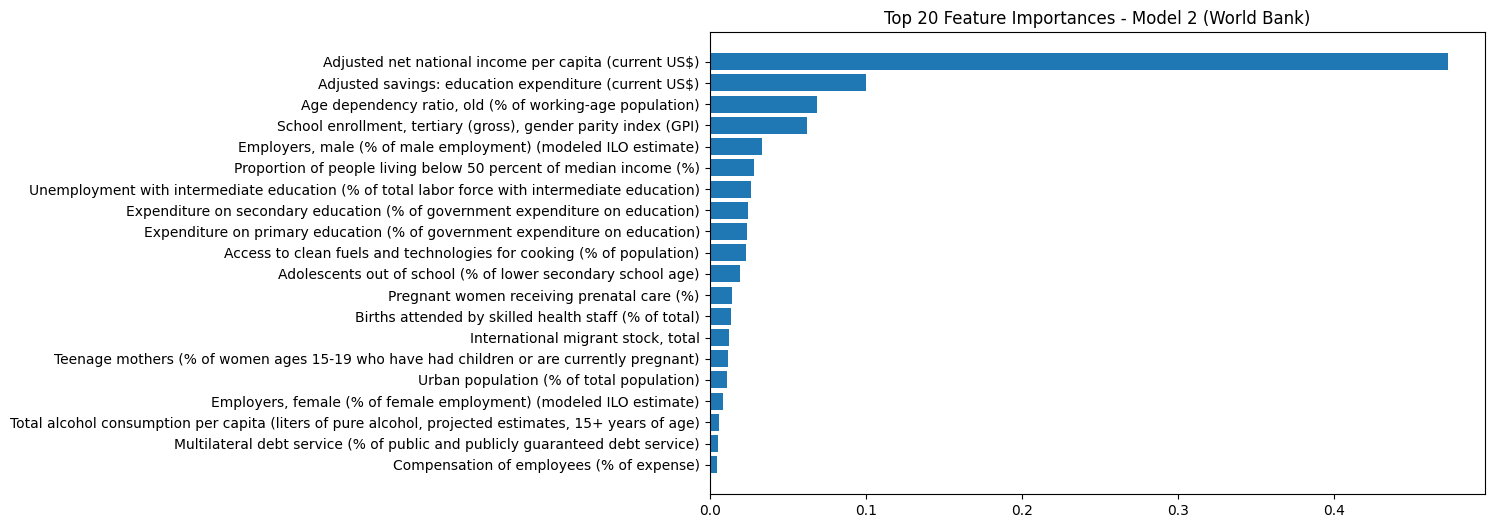

In [15]:
# Feature Importance for Model 2
importances = model2.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh([feature_cols[i] for i in sorted_idx[-20:]], importances[sorted_idx[-20:]])
plt.title("Top 20 Feature Importances - Model 2 (World Bank)")
plt.show()

In [16]:
# Get feature importance scores
importances1 = model1.feature_importances_
importances2 = model2.feature_importances_

# Get sorted indices for top 20 features in both models (sorted by importance value)
top20_idx_model1 = np.argsort(-importances1)[:20]  # Sort in descending order
top20_idx_model2 = np.argsort(-importances2)[:20]  # Sort in descending order

# Convert indices to feature names (use LIST instead of SET to maintain order)
top20_features_model1 = [feature_cols[i] for i in top20_idx_model1]
top20_features_model2 = [feature_cols[i] for i in top20_idx_model2]

# Find common features in both models' top 20 (ORDER-PRESERVING INTERSECTION)
common_top20_features = [f for f in top20_features_model1 if f in top20_features_model2]

# Print shared features in top 20
print("Shared Features in Top 20 for Both Models:")
for feature in common_top20_features:
    print(f"- {feature}")

Shared Features in Top 20 for Both Models:
- Adjusted net national income per capita (current US$)
- School enrollment, tertiary (gross), gender parity index (GPI)
- Adolescents out of school (% of lower secondary school age)
- Expenditure on primary education (% of government expenditure on education)
- Adjusted savings: education expenditure (current US$)
- International migrant stock, total
- Access to clean fuels and technologies for cooking (% of population)
- Proportion of people living below 50 percent of median income (%)
- Employers, female (% of female employment) (modeled ILO estimate)
- Compensation of employees (% of expense)
- Multilateral debt service (% of public and publicly guaranteed debt service)
- Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)
- Births attended by skilled health staff (% of total)
- Pregnant women receiving prenatal care (%)


In [17]:
print(top20_idx_model1)
print(top20_idx_model2)

[ 4 42 33  6 22  5 12 19 25  0  1 30 20 11 15 26 34  8 29 10]
[ 4  5  7 33 21 30 39 23 22  0  6 29  8 25 34 41 20 36 26 15]


XGBoost (Reduced Features) - Multidimensional poverty headcount ratio (UNDP) (% of population): MSE = 155.04, MAE = 6.02, R² = 0.759
XGBoost (Reduced Features) - Multidimensional poverty headcount ratio (World Bank) (% of population): MSE = 159.06, MAE = 5.96, R² = 0.724


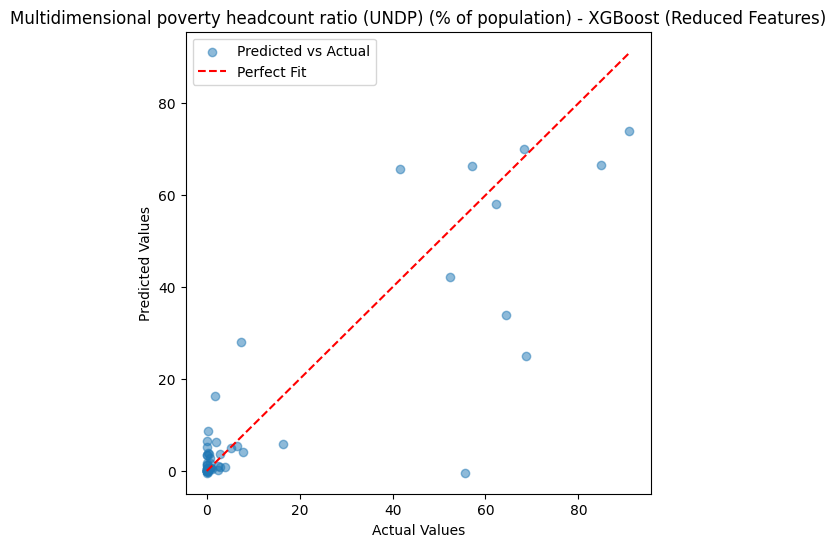

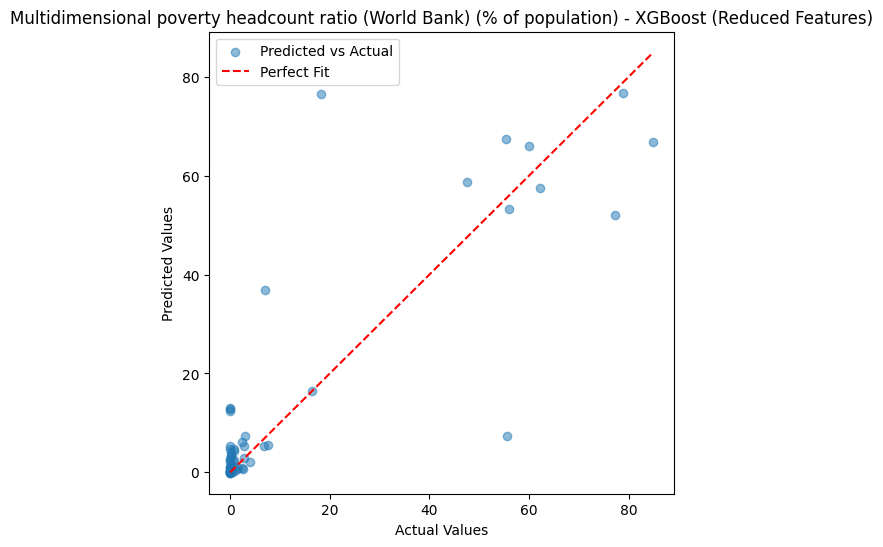

In [18]:
selected_features = common_top20_features

# Extract the reduced feature matrix
X_reduced = filtered_pivot_all[selected_features].values

# Split the data for both poverty indices
X_train_reduced, X_test_reduced, y1_train, y1_test = train_test_split(X_reduced, y1, test_size=0.2, random_state=42)
X_train2_reduced, X_test2_reduced, y2_train, y2_test = train_test_split(X_reduced, y2, test_size=0.2, random_state=42)

# Train XGBoost with reduced features
model1_reduced = XGBRegressor(random_state=42)
model1_reduced.fit(X_train_reduced, y1_train)
y1_pred_reduced = model1_reduced.predict(X_test_reduced)

model2_reduced = XGBRegressor(random_state=42)
model2_reduced.fit(X_train2_reduced, y2_train)
y2_pred_reduced = model2_reduced.predict(X_test2_reduced)

# Evaluate performance
mse1_reduced = mean_squared_error(y1_test, y1_pred_reduced)
mae1_reduced = mean_absolute_error(y1_test, y1_pred_reduced)
r2_1_reduced = r2_score(y1_test, y1_pred_reduced)

mse2_reduced = mean_squared_error(y2_test, y2_pred_reduced)
mae2_reduced = mean_absolute_error(y2_test, y2_pred_reduced)
r2_2_reduced = r2_score(y2_test, y2_pred_reduced)

print(f"XGBoost (Reduced Features) - {target_indicators[0]}: MSE = {mse1_reduced:.2f}, MAE = {mae1_reduced:.2f}, R² = {r2_1_reduced:.3f}")
print(f"XGBoost (Reduced Features) - {target_indicators[1]}: MSE = {mse2_reduced:.2f}, MAE = {mae2_reduced:.2f}, R² = {r2_2_reduced:.3f}")

# Plot results
def plot_results(y_test, y_pred, target_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{target_name} - XGBoost (Reduced Features)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
    plt.legend()
    plt.show()

plot_results(y1_test, y1_pred_reduced, target_indicators[0])
plot_results(y2_test, y2_pred_reduced, target_indicators[1])

Sorted Feature Importance Scores: [0.27853695 0.17744973 0.15881944 0.0749764  0.0598465  0.05504088
 0.0412081  0.03597922 0.02677497 0.02456994 0.02346277 0.02245646
 0.01354431 0.00733443]
Sorted Feature Names: ['Adjusted net national income per capita (current US$)', 'Access to clean fuels and technologies for cooking (% of population)', 'Adolescents out of school (% of lower secondary school age)', 'Adjusted savings: education expenditure (current US$)', 'Expenditure on primary education (% of government expenditure on education)', 'School enrollment, tertiary (gross), gender parity index (GPI)', 'Compensation of employees (% of expense)', 'International migrant stock, total', 'Proportion of people living below 50 percent of median income (%)', 'Births attended by skilled health staff (% of total)', 'Employers, female (% of female employment) (modeled ILO estimate)', 'Multilateral debt service (% of public and publicly guaranteed debt service)', 'Teenage mothers (% of women ages 1

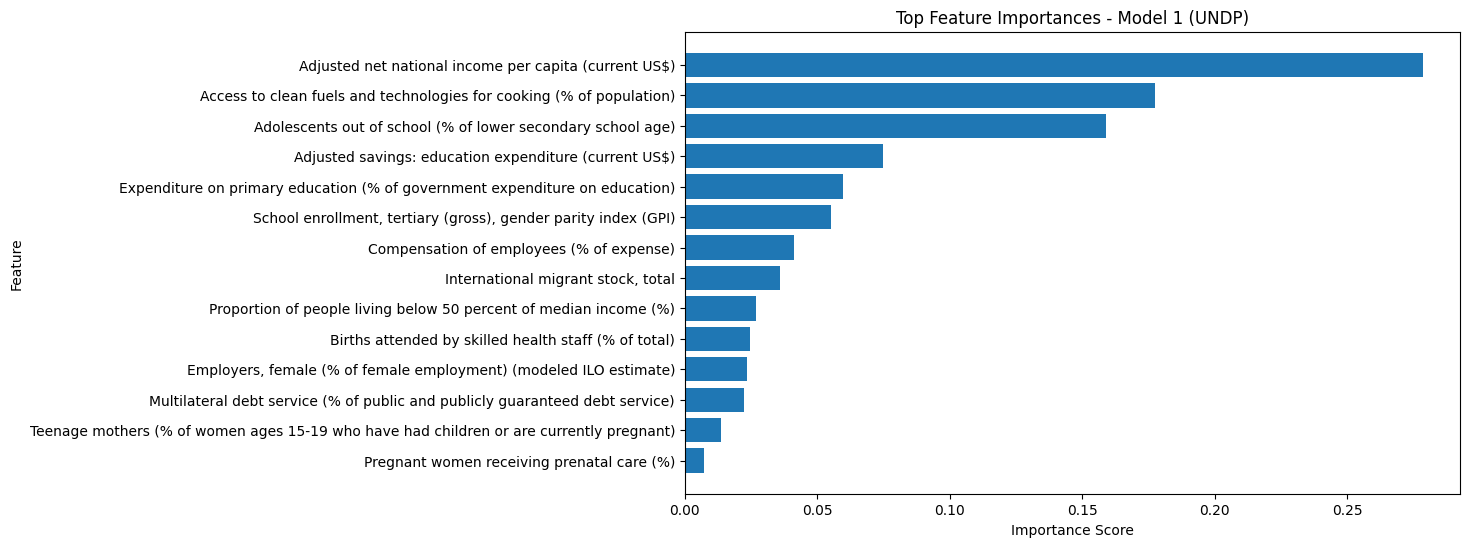

In [19]:
importances1 = model1_reduced.feature_importances_

# Sort indices by feature importance in descending order
sorted_idx1 = np.argsort(-importances1)  # Reverse sorting

# Ensure correct feature alignment
feature_names1 = [selected_features[i] for i in sorted_idx1]  # Match indices with selected features

# Print results to verify
print("Sorted Feature Importance Scores:", importances1[sorted_idx1])
print("Sorted Feature Names:", feature_names1)

# Plot correctly ordered feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names1[::-1], importances1[sorted_idx1[::-1]])  # Reverse for better visualization
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top Feature Importances - Model 1 (UNDP)")
plt.show()

Sorted Feature Importance Scores: [0.27853695 0.17744973 0.0749764  0.02677497 0.02346277 0.05504088
 0.15881944 0.0598465  0.01354431 0.03597922 0.00733443 0.0412081
 0.02456994 0.02245646]
Sorted Feature Names: ['Adjusted net national income per capita (current US$)', 'Access to clean fuels and technologies for cooking (% of population)', 'Adjusted savings: education expenditure (current US$)', 'Proportion of people living below 50 percent of median income (%)', 'Employers, female (% of female employment) (modeled ILO estimate)', 'School enrollment, tertiary (gross), gender parity index (GPI)', 'Adolescents out of school (% of lower secondary school age)', 'Expenditure on primary education (% of government expenditure on education)', 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)', 'International migrant stock, total', 'Pregnant women receiving prenatal care (%)', 'Compensation of employees (% of expense)', 'Births attended by skilled health 

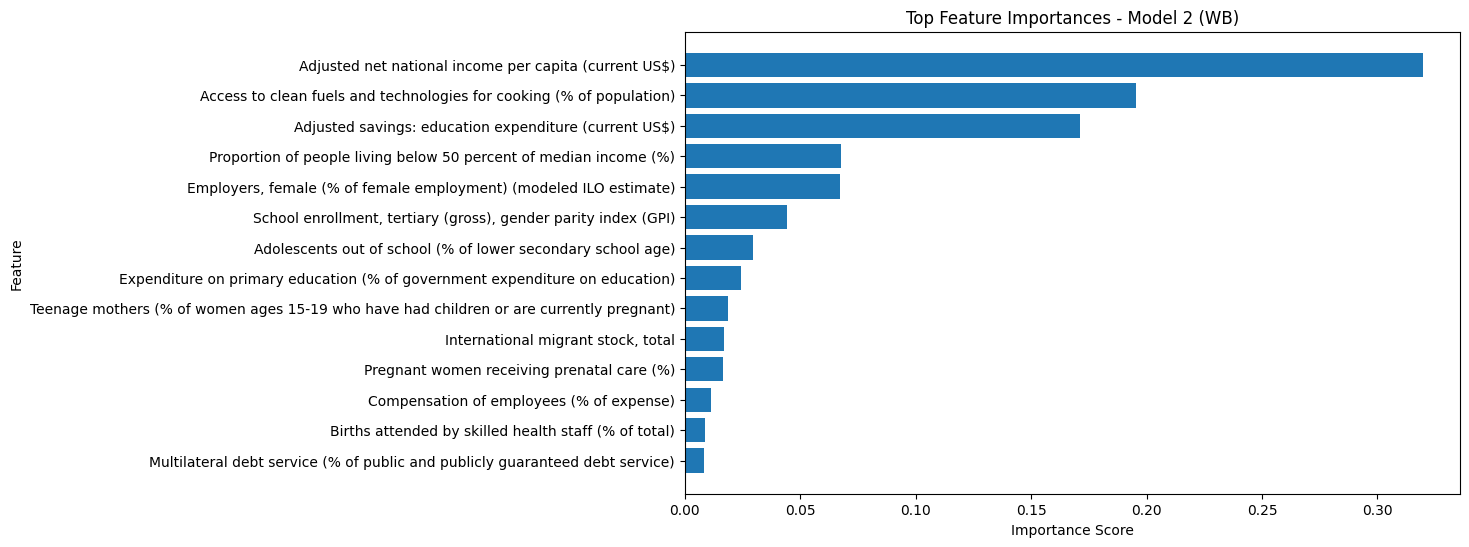

In [20]:
importances2 = model2_reduced.feature_importances_

# Sort indices by feature importance in descending order
sorted_idx2 = np.argsort(-importances2)  # Reverse sorting

# Ensure correct feature alignment
feature_names2 = [selected_features[i] for i in sorted_idx2]  # Match indices with selected features

# Print results to verify
print("Sorted Feature Importance Scores:", importances1[sorted_idx2])
print("Sorted Feature Names:", feature_names2)

# Plot correctly ordered feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names2[::-1], importances2[sorted_idx2[::-1]])  # Reverse for better visualization
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top Feature Importances - Model 2 (WB)")
plt.show()

In [21]:
# Extract feature importance values from trained XGBoost model
feature_importance = model1_reduced.feature_importances_

# Use the same order of features as used in training
top_features = selected_features  
top_importances = feature_importance

# Normalize importance values (avoid division by zero)
importance_sum = np.maximum(np.sum(top_importances), 1e-8)
normalized_importances = top_importances / importance_sum

# Train a Ridge Regression model to determine directionality (on reduced features)
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train Ridge Regression on the reduced feature set
ridge_model.fit(X_train_reduced, y1_train)

# Extract Ridge coefficients for all selected features
ridge_coefs = {feature: coef for feature, coef in zip(selected_features, ridge_model.coef_)}

# Generate the final equation (maintaining original order)
equation = "Poverty Index (UNDP) =\n"
for weight, feature in zip(normalized_importances, top_features):
    sign = "-" if ridge_coefs.get(feature, 1) < 0 else "+"  # Get direction from Ridge regression
    equation += f"  {sign} {abs(weight):.4f} × {feature}\n"

# Print the final equation
print(equation)

Poverty Index (UNDP) =
  + 0.2785 × Adjusted net national income per capita (current US$)
  - 0.0550 × School enrollment, tertiary (gross), gender parity index (GPI)
  + 0.1588 × Adolescents out of school (% of lower secondary school age)
  + 0.0598 × Expenditure on primary education (% of government expenditure on education)
  - 0.0750 × Adjusted savings: education expenditure (current US$)
  - 0.0360 × International migrant stock, total
  - 0.1774 × Access to clean fuels and technologies for cooking (% of population)
  + 0.0268 × Proportion of people living below 50 percent of median income (%)
  - 0.0235 × Employers, female (% of female employment) (modeled ILO estimate)
  - 0.0412 × Compensation of employees (% of expense)
  + 0.0225 × Multilateral debt service (% of public and publicly guaranteed debt service)
  + 0.0135 × Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)
  - 0.0246 × Births attended by skilled health staff (% of total)
  + 0.

/Users/tom/Documents/My_code/CxC 2025/cxc/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.12175e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [22]:
# Extract feature importance values from trained XGBoost model
feature_importance = model2_reduced.feature_importances_

# Use the same order of features as used in training
top_features = selected_features  # Ensure correct feature alignment
top_importances = feature_importance

# Normalize importance values (avoid division by zero)
importance_sum = np.maximum(np.sum(top_importances), 1e-8)
normalized_importances = top_importances / importance_sum

# Train Ridge Regression only on the selected features
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train Ridge Regression on the reduced feature set
ridge_model.fit(X_train2_reduced, y2_train)

# Get Ridge coefficients for the selected features
ridge_coefs = {feature: coef for feature, coef in zip(selected_features, ridge_model.coef_)}

# Generate the final equation (maintaining original order)
equation = "Poverty Index (WB) =\n"
for weight, feature in zip(normalized_importances, top_features):
    sign = "-" if ridge_coefs.get(feature, 1) < 0 else "+"  # Get direction from Ridge regression
    equation += f"  {sign} {abs(weight):.4f} × {feature}\n"

# Print the final equation
print(equation)

Poverty Index (WB) =
  + 0.3197 × Adjusted net national income per capita (current US$)
  - 0.0441 × School enrollment, tertiary (gross), gender parity index (GPI)
  + 0.0294 × Adolescents out of school (% of lower secondary school age)
  + 0.0244 × Expenditure on primary education (% of government expenditure on education)
  - 0.1712 × Adjusted savings: education expenditure (current US$)
  - 0.0169 × International migrant stock, total
  - 0.1952 × Access to clean fuels and technologies for cooking (% of population)
  + 0.0678 × Proportion of people living below 50 percent of median income (%)
  - 0.0672 × Employers, female (% of female employment) (modeled ILO estimate)
  - 0.0115 × Compensation of employees (% of expense)
  + 0.0083 × Multilateral debt service (% of public and publicly guaranteed debt service)
  + 0.0187 × Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)
  - 0.0089 × Births attended by skilled health staff (% of total)
  + 0.01

/Users/tom/Documents/My_code/CxC 2025/cxc/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.12175e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
